In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Data wrangling

In [4]:
# Loading the dataset
df=pd.read_csv('AAL.csv')

In [6]:
df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [8]:
#just checking the rows and columns
df.shape

(7560, 6)

In [10]:
#a.check and Ensure that the data is clean and free from any missing or incorrect entries. 
df.isna().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [12]:
#  Based on your knowledge of data analytics, include your recommendations for treating missing and incorrect data (dropping the null values or filling them)

Observation : There is no missing or incorrect data is there
if it is present there is 2 approach
1.Drop specific column if missing values are more than 30-40%
2.fill with either mean,median,mode. and mode is more effective

In [15]:
# Choose a suitable data wrangling technique—either data standardization
# or normalization. Execute the preferred normalization method and
# present the resulting data. (Normalization is the preferred approach for this
# problem.)
# we using the sales and unit for scalling
df.head().columns

Index(['Date', 'Time', 'State', 'Group', 'Unit', 'Sales'], dtype='object')

In [17]:
normal=['Sales','Unit']

In [19]:
df[normal]=(df[normal] - df[normal].min())/(df[normal].max()-df[normal].min())

In [21]:
df[normal]

,Sales,Unit
0,0.095238,0.095238
1,0.095238,0.095238
2,0.031746,0.031746
3,0.206349,0.206349
4,0.015873,0.015873
...,...,...
7555,0.190476,0.190476
7556,0.206349,0.206349
7557,0.206349,0.206349
7558,0.142857,0.142857


In [23]:
df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,0.095238,0.095238
1,1-Oct-2020,Morning,WA,Men,0.095238,0.095238
2,1-Oct-2020,Morning,WA,Women,0.031746,0.031746
3,1-Oct-2020,Morning,WA,Seniors,0.206349,0.206349
4,1-Oct-2020,Afternoon,WA,Kids,0.015873,0.015873


In [25]:
# Share your insights regarding the application of the GroupBy() function for
# either data chunking or merging, and offer a recommendation based on
# your analysis.

In [27]:
# Data chunking refers to breaking down the data into meaningful segments
# so according to my dataset I am using data chunking. not merging because merging happens only when their test datset available so that we can merge te data

#for total sales 
total_sales=df.groupby(['State','Sales']).sum().reset_index()

In [29]:
print(total_sales)

    State     Sales                                               Date  \
0     NSW  0.158730  4-Nov-20205-Nov-20205-Nov-20208-Nov-20209-Nov-...   
1     NSW  0.174603  2-Nov-20206-Nov-202012-Nov-202012-Nov-202018-N...   
2     NSW  0.190476  2-Nov-20202-Nov-20202-Nov-20203-Nov-20205-Nov-...   
3     NSW  0.206349  2-Oct-20203-Oct-20205-Oct-20206-Oct-202013-Oct...   
4     NSW  0.222222  7-Oct-20209-Oct-202010-Oct-202011-Oct-202017-O...   
..    ...       ...                                                ...   
166    WA  0.142857  1-Oct-20205-Oct-20209-Oct-202010-Oct-202010-Oc...   
167    WA  0.158730  5-Oct-20206-Oct-20207-Oct-20208-Oct-20209-Oct-...   
168    WA  0.174603  2-Oct-20202-Oct-20202-Oct-20203-Oct-20203-Oct-...   
169    WA  0.190476  5-Oct-20206-Oct-20206-Oct-20208-Oct-20208-Oct-...   
170    WA  0.206349  1-Oct-20201-Oct-20201-Oct-20203-Oct-20204-Oct-...   

                                                  Time  \
0     Evening Evening Evening Evening Afternoon Eve..

In [31]:
df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,0.095238,0.095238
1,1-Oct-2020,Morning,WA,Men,0.095238,0.095238
2,1-Oct-2020,Morning,WA,Women,0.031746,0.031746
3,1-Oct-2020,Morning,WA,Seniors,0.206349,0.206349
4,1-Oct-2020,Afternoon,WA,Kids,0.015873,0.015873


# Data analysis

In [34]:
# Perform descriptive statistical analysis on the data in the Sales and Unit 
# columns. Utilize techniques such as mean, median, mode, and standard 
# deviation for this analysis

#for sales
sales_mean=df['Sales'].mean()
sales_median=df['Sales'].median()
sales_mode=df['Sales'].mode()[0]
sales_std=df['Sales'].std()
print(sales_mean)
print(sales_median)
print(sales_mode)
print(sales_std)

0.25405433778449654
0.19047619047619047
0.1111111111111111
0.20478417107280086


In [36]:
#for units
sales_mean=df['Unit'].mean()
sales_median=df['Unit'].median()
sales_mode=df['Unit'].mode()[0]
sales_std=df['Unit'].std()
print(sales_mean)
print(sales_median)
print(sales_mode)
print(sales_std)

0.25405433778449654
0.19047619047619047
0.1111111111111111
0.20478417107280086


In [38]:
# Identify the group with the highest sales and the group with the lowest 
# sales based on the data provided
df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,0.095238,0.095238
1,1-Oct-2020,Morning,WA,Men,0.095238,0.095238
2,1-Oct-2020,Morning,WA,Women,0.031746,0.031746
3,1-Oct-2020,Morning,WA,Seniors,0.206349,0.206349
4,1-Oct-2020,Afternoon,WA,Kids,0.015873,0.015873


In [40]:
#Lowest sales
sales_sum=df.groupby('Group')['Sales'].sum()
lowest_sales_group=sales_sum.idxmin()
lowest_sales_value=sales_sum.min()
print(lowest_sales_group)
print(lowest_sales_value)

 Seniors
473.57142857142856


In [42]:
#highest sales
sales_sum=df.groupby('Group')['Sales'].sum()
highest_sales_group=sales_sum.idxmax()
highest_sales_value=sales_sum.max()
print(highest_sales_group)
print(highest_sales_value)


 Men
484.4444444444444


In [44]:
# Generate weekly, monthly, and quarterly reports to document and 
# present the results of the analysis conducted


In [124]:
from scipy import stats

# Load the dataset
df = pd.read_csv('AAL.csv')

# Ensure Date column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%Y')

# Add time-based groupings
df['Week'] = df['Date'].dt.to_period('W').apply(lambda r: r.start_time)
df['Month'] = df['Date'].dt.to_period('M').apply(lambda r: r.start_time)
df['Quarter'] = df['Date'].dt.to_period('Q').apply(lambda r: r.start_time)

In [126]:
#weekly sales
weekly_sales = df.groupby('Week')['Sales'].sum().reset_index()
weekly_units = df.groupby('Week')['Unit'].sum().reset_index()
#monthly sales
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()
monthly_units = df.groupby('Month')['Unit'].sum().reset_index()
#Quarterly Sales
quarterly_sales = df.groupby('Quarter')['Sales'].sum().reset_index()
quarterly_units = df.groupby('Quarter')['Unit'].sum().reset_index()

In [136]:
print(weekly_sales)
print(weekly_sales)
print("Weekly Units")
print(weekly_units)

         Week     Sales
0  2020-09-28  15045000
1  2020-10-05  27002500
2  2020-10-12  26640000
3  2020-10-19  26815000
4  2020-10-26  21807500
5  2020-11-02  20865000
6  2020-11-09  21172500
7  2020-11-16  21112500
8  2020-11-23  21477500
9  2020-11-30  29622500
10 2020-12-07  31525000
11 2020-12-14  31655000
12 2020-12-21  31770000
13 2020-12-28  13792500
         Week     Sales
0  2020-09-28  15045000
1  2020-10-05  27002500
2  2020-10-12  26640000
3  2020-10-19  26815000
4  2020-10-26  21807500
5  2020-11-02  20865000
6  2020-11-09  21172500
7  2020-11-16  21112500
8  2020-11-23  21477500
9  2020-11-30  29622500
10 2020-12-07  31525000
11 2020-12-14  31655000
12 2020-12-21  31770000
13 2020-12-28  13792500
Weekly Units
         Week   Unit
0  2020-09-28   6018
1  2020-10-05  10801
2  2020-10-12  10656
3  2020-10-19  10726
4  2020-10-26   8723
5  2020-11-02   8346
6  2020-11-09   8469
7  2020-11-16   8445
8  2020-11-23   8591
9  2020-11-30  11849
10 2020-12-07  12610
11 2020-12-14  

In [138]:
print("Monthly Report")
print(monthly_sales)
print("Monthly Units")
print(monthly_units)

Monthly Report
       Month      Sales
0 2020-10-01  114290000
1 2020-11-01   90682500
2 2020-12-01  135330000
Monthly Units
       Month   Unit
0 2020-10-01  45716
1 2020-11-01  36273
2 2020-12-01  54132


In [140]:
print("Quarterly Report")
print(quarterly_sales)
print("Quarterly Units")
print(quarterly_units)


Quarterly Report
     Quarter      Sales
0 2020-10-01  340302500
Quarterly Units
     Quarter    Unit
0 2020-10-01  136121


# Data visualization

In [68]:
df.head()

,time,state,group,unit,sales
date,,,,,
2023-01-01,Morning,WA,Kids,0.095238,0.095238
2023-01-02,Morning,WA,Men,0.095238,0.095238
2023-01-03,Morning,WA,Women,0.031746,0.031746
2023-01-04,Morning,WA,Seniors,0.206349,0.206349
2023-01-05,Afternoon,WA,Kids,0.015873,0.015873


# State-wise sales analysis for different demographic groups (kids, 
# women, men, and seniors).

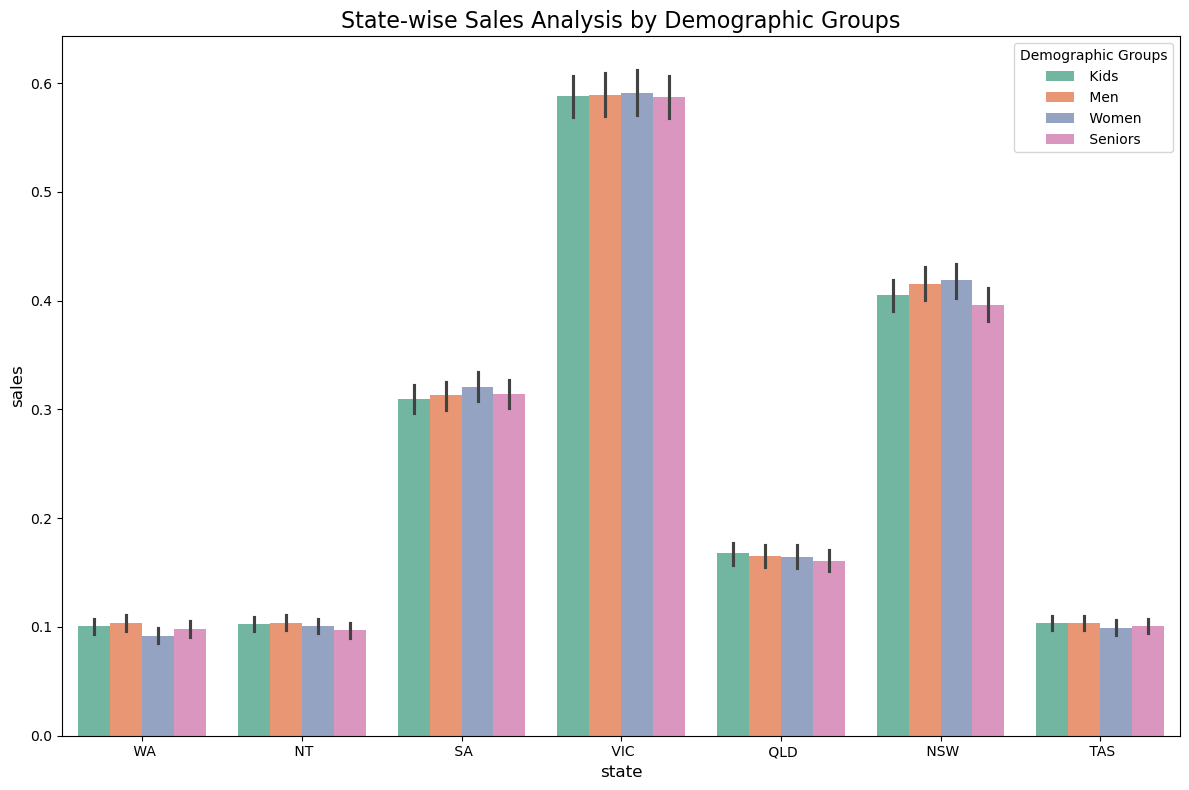

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.barplot(x="state", y="sales", hue="group", data=df, palette="Set2")

# Add titles and labels
plt.title("State-wise Sales Analysis by Demographic Groups", fontsize=16)
plt.xlabel("state", fontsize=12)
plt.ylabel("sales", fontsize=12)
plt.legend(title="Demographic Groups")
plt.tight_layout()
plt.show()


# Box Plot

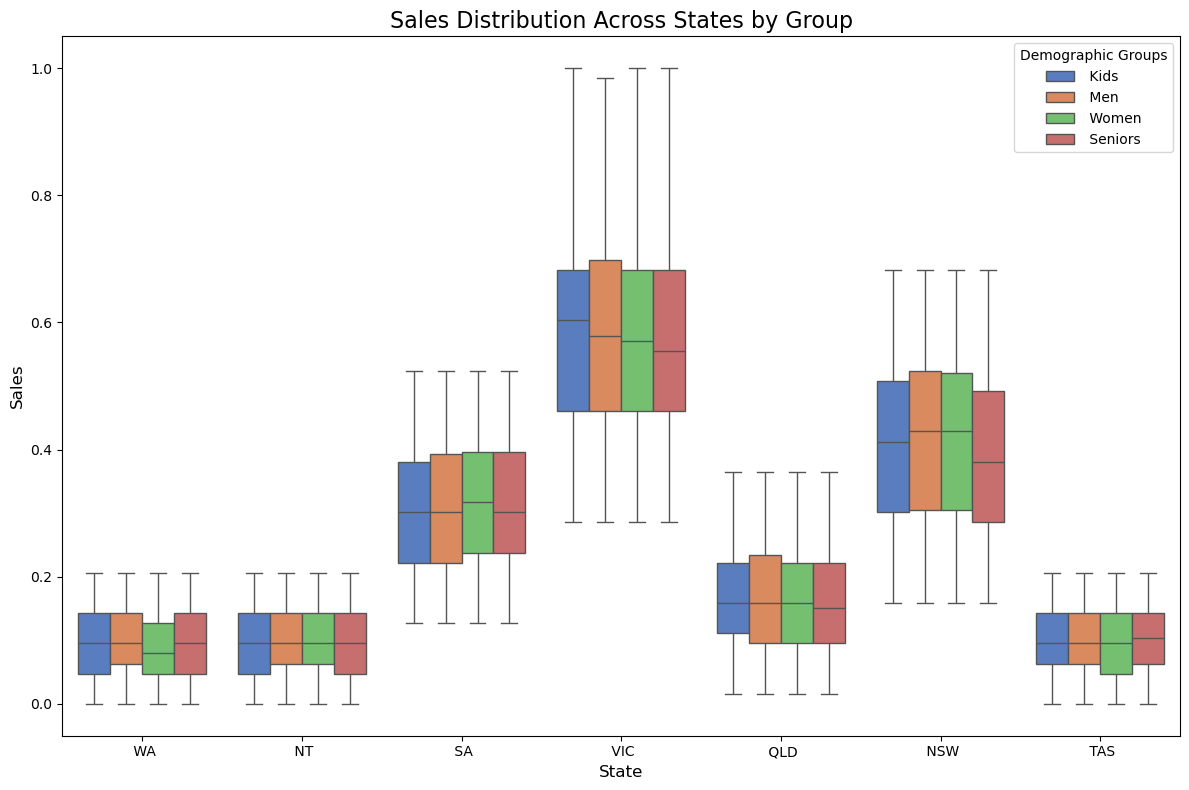

In [80]:
# Box Plot: Compare sales distribution across states for each group.
plt.figure(figsize=(12, 8))
sns.boxplot(x="state", y="sales", hue="group", data=df, palette="muted")

# Add titles and labels
plt.title("Sales Distribution Across States by Group", fontsize=16)
plt.xlabel("State", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.legend(title="Demographic Groups")
plt.tight_layout()
plt.show()

# Group-wise sales analysis (Kids, Women, Men, and Seniors) across 
# various states.

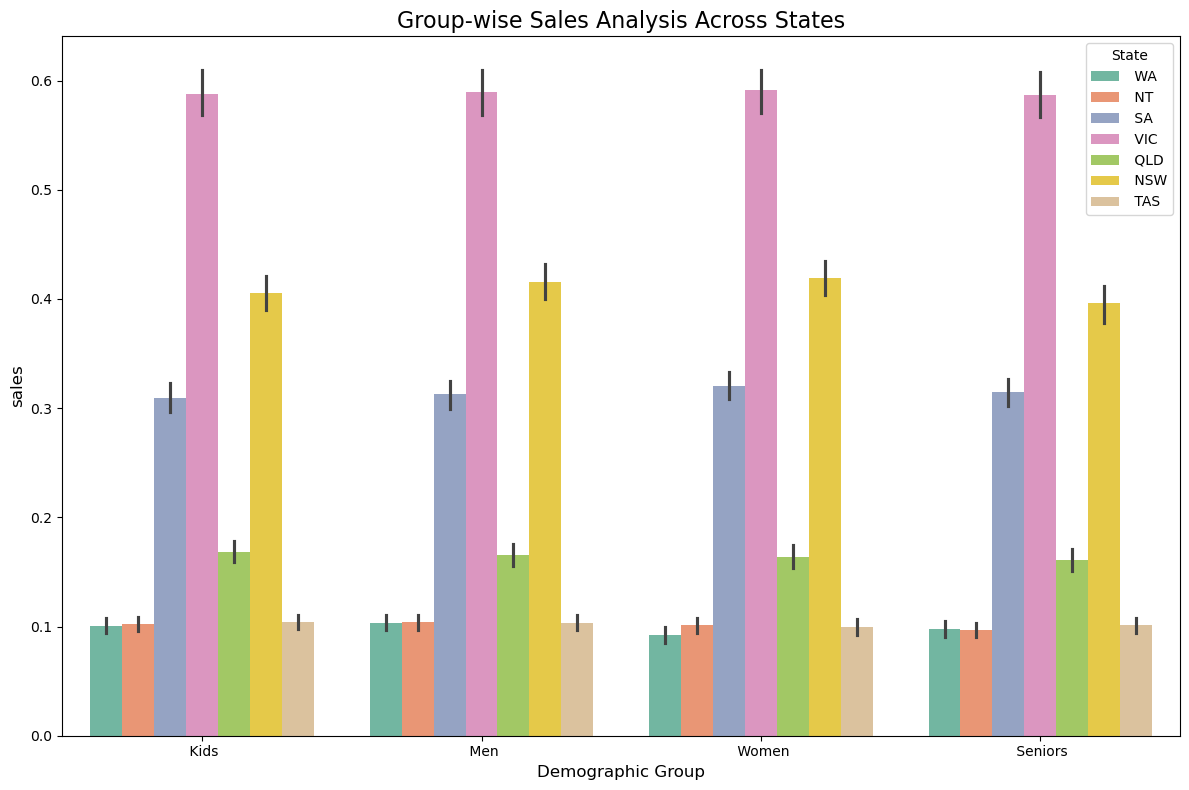

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.barplot(x="group", y="sales", hue="state", data=df, palette="Set2")

# Add titles and labels
plt.title("Group-wise Sales Analysis Across States", fontsize=16)
plt.xlabel("Demographic Group", fontsize=12)
plt.ylabel("sales", fontsize=12)
plt.legend(title="State")
plt.tight_layout()
plt.show()


# Box plot

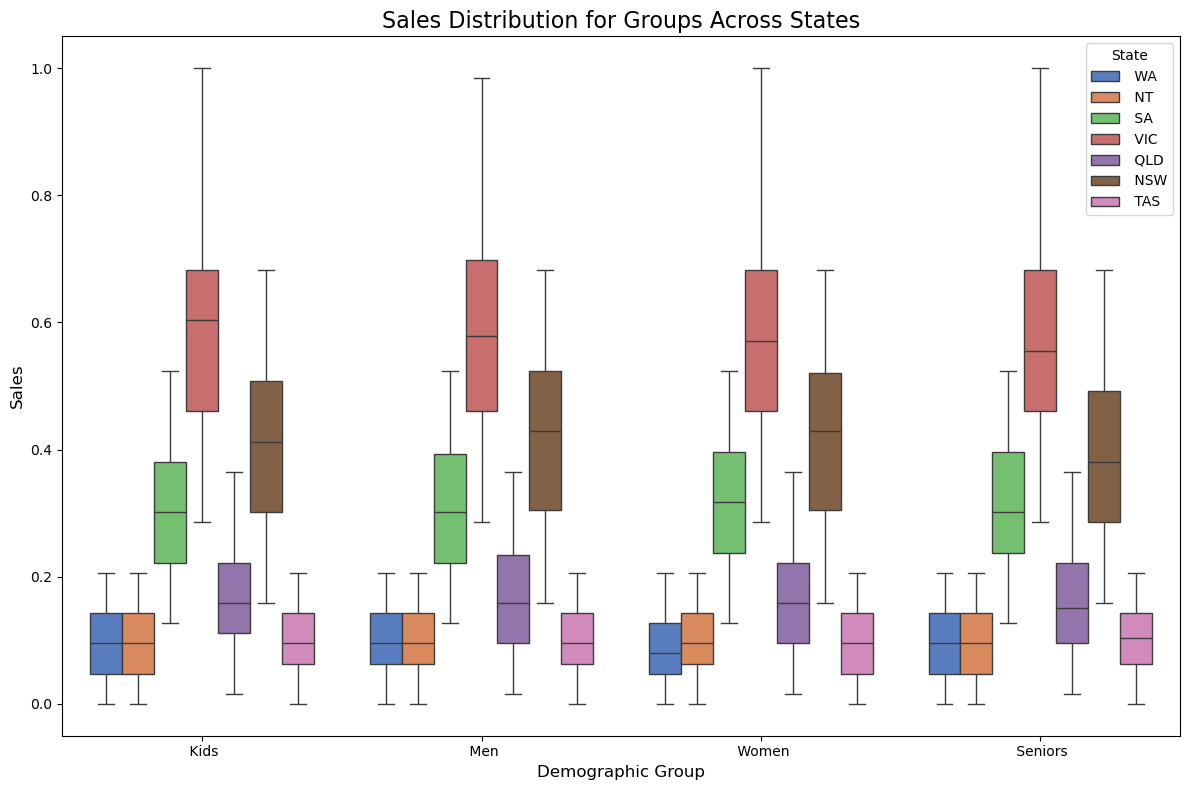

In [91]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="group", y="sales", hue="state", data=df, palette="muted")

# Add titles and labels
plt.title("Sales Distribution for Groups Across States", fontsize=16)
plt.xlabel("Demographic Group", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.legend(title="State")
plt.tight_layout()
plt.show()


In [93]:
df.head()

,time,state,group,unit,sales
date,,,,,
2023-01-01,Morning,WA,Kids,0.095238,0.095238
2023-01-02,Morning,WA,Men,0.095238,0.095238
2023-01-03,Morning,WA,Women,0.031746,0.031746
2023-01-04,Morning,WA,Seniors,0.206349,0.206349
2023-01-05,Afternoon,WA,Kids,0.015873,0.015873


C:\Users\hp\AppData\Local\Temp\ipykernel_24452\2073512115.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




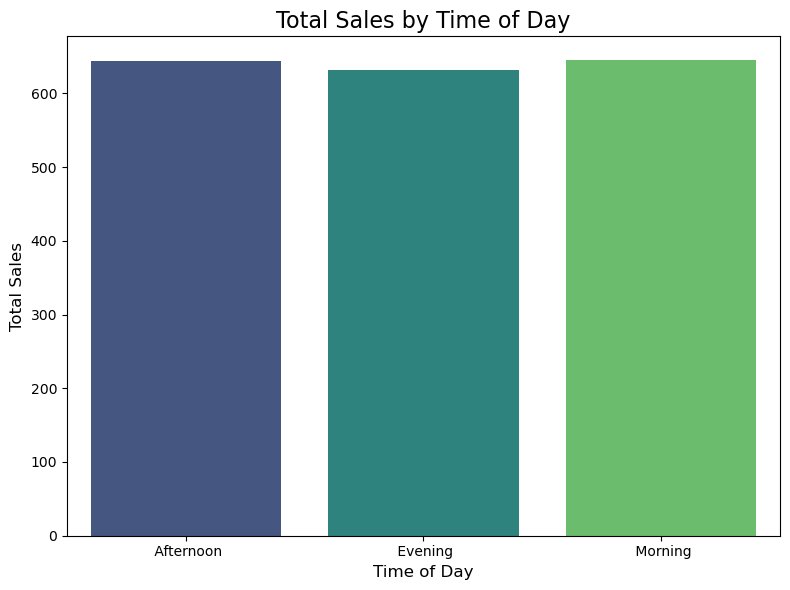

In [101]:

# Aggregate sales by time of day
time_sales = df.groupby("time")["sales"].sum().reset_index()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x="time", y="sales", data=time_sales, palette="viridis")

# Add titles and labels
plt.title("Total Sales by Time of Day", fontsize=16)
plt.xlabel("Time of Day", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.tight_layout()
plt.show()


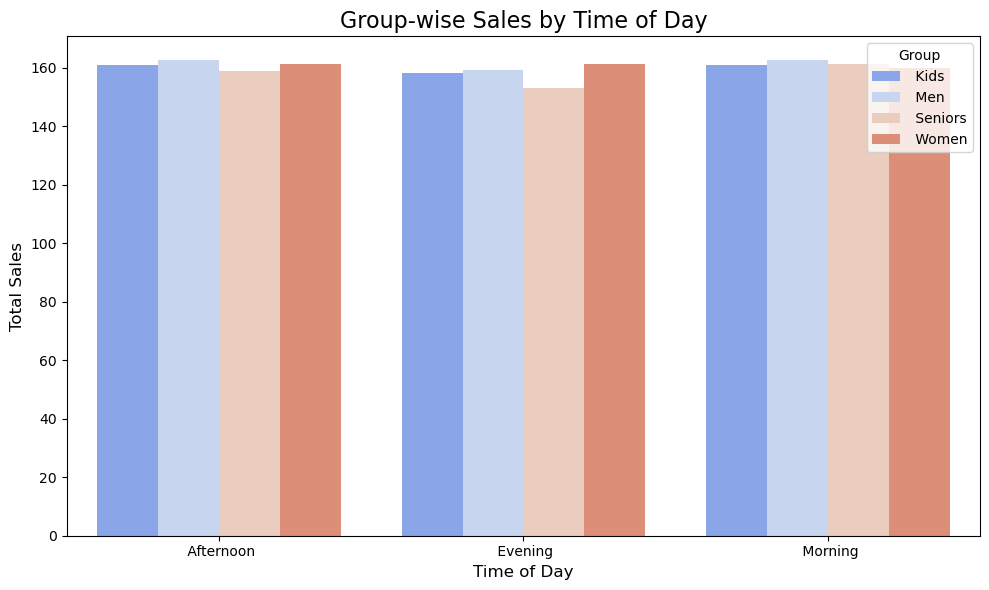

In [107]:
# Group data by time of day and group, summing up sales
time_group_sales = df.groupby(["time", "group"])["sales"].sum().reset_index()
# Plot group-wise sales
plt.figure(figsize=(10, 6))
sns.barplot(x="time", y="sales", hue="group", data=time_group_sales, palette="coolwarm")

# Add titles and labels
plt.title("Group-wise Sales by Time of Day", fontsize=16)
plt.xlabel("Time of Day", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.legend(title="Group")
plt.tight_layout()
plt.show()


# The dashboard must contain daily, weekly, monthly, and quarterly charts

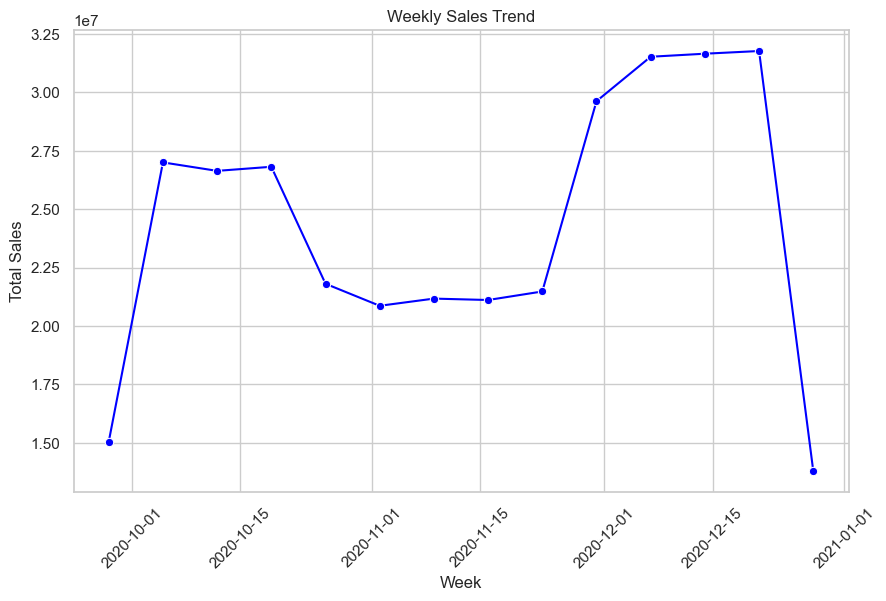

In [142]:
# Line plot for weekly sales
plt.figure(figsize=(10, 6))
sns.lineplot(data=weekly_sales, x='Week', y='Sales', marker='o', color='blue')
plt.title("Weekly Sales Trend")
plt.xlabel("Week")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_24452\161473279.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




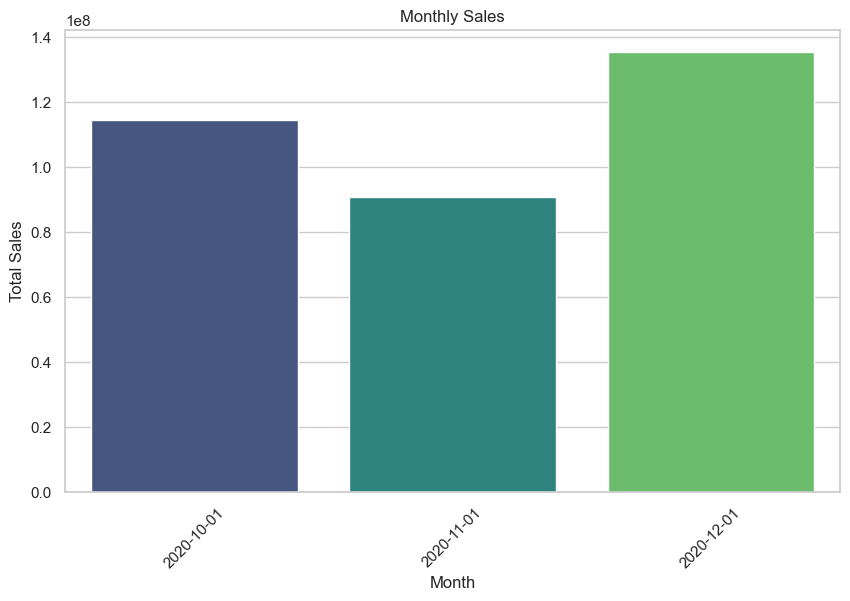

In [144]:
# Bar plot for monthly sales
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_sales, x='Month', y='Sales', palette='viridis')
plt.title("Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_24452\1134486352.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




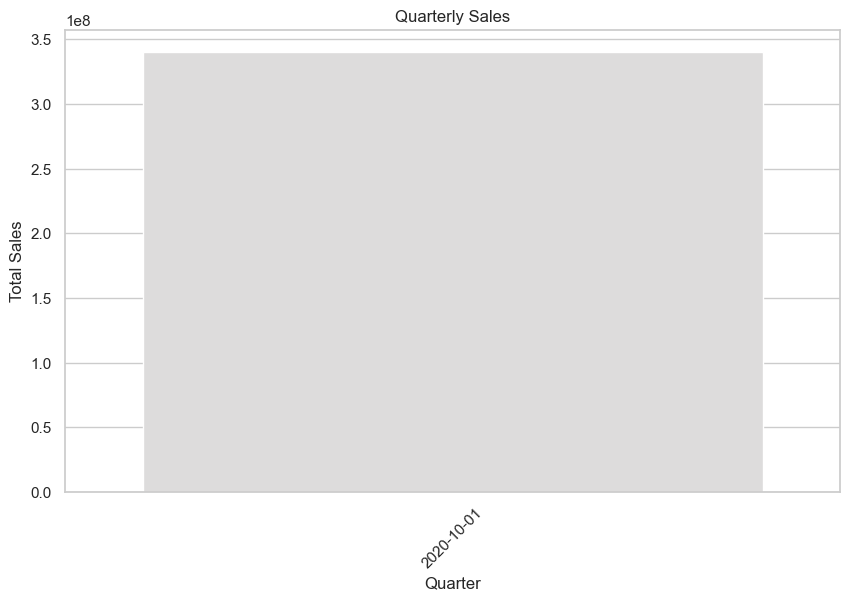

In [146]:
# Bar plot for quarterly sales
plt.figure(figsize=(10, 6))
sns.barplot(data=quarterly_sales, x='Quarter', y='Sales', palette='coolwarm')
plt.title("Quarterly Sales")
plt.xlabel("Quarter")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()
